<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/_6_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83(K_Nearest_Neighbor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

### KNeighborsClassifier params

* algorithm : 가장 가까운 이웃을 계산하는데 사용하는 알고리즘으로 auto 는 fit 메소드에서 전달된 값을 기반으로 가장 적합한 알고리즘을 결정하려고 시도하는 것 입니다. (그 외 ball_tree, kd_tree, brute)
* Leaf_size : ballTree 나 kd_tree에 전달하는 leaf의 크기로,  default 값은 30입니다.트리에서 몇 대 몇으로 나눠서 뻗어 나갈지를 나타내는 값으로 Leaf size가 너무 작으면, 가지 수가 너무 많아 짐에 따라 노이즈가 끼기 쉽고 속도가 느리다. Leaf size가 너무 크면, 너무 대충 분류해서 예측 성능이 낮아진다.
* metric: 거리 측정 방식을 변경하는 매개변수로 default 값은 minkowsi 입니다.
* metric_params: 메트릭 함수의 추가 키워드로 기본값은 None 이다
* n_jobs: 이웃을 검색하기 위해 실행하는 병렬 작업 수
* n_neighbors: 검색할 이웃의 수로 default 값은 5입니다.
* p: minkowski 의 매개변수입니다.
* Weights 는 예측에 사용하는 가중치로 uniform 은 각 이웃에 동일한 가중치를 , ‘distance’는 가까운 이웃이 멀리 있는 이웃보다 더욱 큰 영향을 미친다.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing

plt.style.use(['seaborn-whitegrid'])

In [19]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [21]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [22]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#print(X[0:5])

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

#print(X_train_scale[0:5])
#print(X_test_scale[0:5])

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9666666666666667
0.9666666666666667


In [24]:
model_scaler = KNeighborsClassifier()
model_scaler.fit(X_train_scale, y_train)

print(model_scaler.score(X_train_scale, y_train))
print(model_scaler.score(X_test_scale, y_test))

0.9583333333333334
0.9666666666666667


In [25]:
cross_validate(estimator = KNeighborsClassifier(), X=X, y=y, cv=5,  verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00147629, 0.0010097 , 0.0010407 , 0.00070548, 0.00064969]),
 'score_time': array([0.00300646, 0.0031321 , 0.0034523 , 0.00203276, 0.00200725]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [26]:
param_grid = [{'n_neighbors': [3,5,7], 'weights':['uniform', 'distance'], 'algorithm':['ball_tree','kd_tree', 'brute']}]

In [27]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, n_jobs=multiprocessing.cpu_count(), verbose=True)

In [28]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [29]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)
{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
0.9800000000000001


In [30]:
def make_meshgrid(X, y, h=.02):
  X_min, X_max = X.min()-1, X.max()+1
  y_min, y_max = y.min()-1, y.max()+1

  XX, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))

  return XX, yy

def plot_contours(clf, XX, yy, **params):
  Z = clf.predict(np.c_[XX.ravel(), yy.ravel()])
  Z = Z.reshape(XX.shape)
  out = plt.contourf(XX, yy, Z, **params)

  return out

In [31]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,0,1,Target
0,25.652544,-2.765726,0
1,28.296848,-1.705091,0
2,28.122746,-2.918576,0
3,28.591330,-2.530385,0
4,25.637106,-3.192627,0
...,...,...,...
145,-16.086344,2.512403,2
146,-13.624391,-0.015658,2
147,-15.341190,1.577273,2
148,-16.270348,1.831385,2


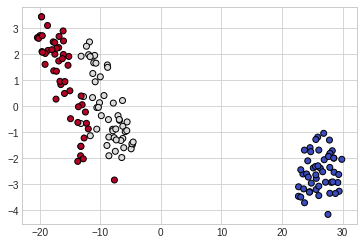

In [32]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors = 'k')

In [33]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

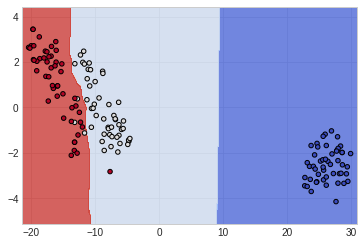

In [34]:
XX, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, XX, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
 

### 유방암 데이터

In [67]:
bearst = load_breast_cancer()
bearst_df = pd.DataFrame(bearst.data, columns=bearst.feature_names)
bearst_df['target'] = bearst.target
bearst_df.shape
#bearst_df.describe()

(569, 31)

In [87]:
X, y =load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(X_train[0:5])

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

print(X_train_scaler[0:5])

model_scaler = KNeighborsClassifier()
model_scaler.fit(X_train_scaler, y_train)

print(model_scaler.score(X_train_scaler, y_train))
print(model_scaler.score(X_test_scaler, y_test))

[[1.386e+01 1.693e+01 9.096e+01 5.789e+02 1.026e-01 1.517e-01 9.901e-02
  5.602e-02 2.106e-01 6.916e-02 2.563e-01 1.194e+00 1.933e+00 2.269e+01
  5.960e-03 3.438e-02 3.909e-02 1.435e-02 1.939e-02 4.560e-03 1.575e+01
  2.693e+01 1.044e+02 7.501e+02 1.460e-01 4.370e-01 4.636e-01 1.654e-01
  3.630e-01 1.059e-01]
 [1.364e+01 1.634e+01 8.721e+01 5.718e+02 7.685e-02 6.059e-02 1.857e-02
  1.723e-02 1.353e-01 5.953e-02 1.872e-01 9.234e-01 1.449e+00 1.455e+01
  4.477e-03 1.177e-02 1.079e-02 7.956e-03 1.325e-02 2.551e-03 1.467e+01
  2.319e+01 9.608e+01 6.567e+02 1.089e-01 1.582e-01 1.050e-01 8.586e-02
  2.346e-01 8.025e-02]
 [2.811e+01 1.847e+01 1.885e+02 2.499e+03 1.142e-01 1.516e-01 3.201e-01
  1.595e-01 1.648e-01 5.525e-02 2.873e+00 1.476e+00 2.198e+01 5.256e+02
  1.345e-02 2.772e-02 6.389e-02 1.407e-02 4.783e-02 4.476e-03 2.811e+01
  1.847e+01 1.885e+02 2.499e+03 1.142e-01 1.516e-01 3.201e-01 1.595e-01
  1.648e-01 5.525e-02]
 [1.199e+01 2.489e+01 7.761e+01 4.413e+02 1.030e-01 9.218e-02 5.441

In [43]:
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())

cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.4s finished


{'fit_time': array([0.01002455, 0.00297165, 0.00258088, 0.00251102, 0.00265932]),
 'score_time': array([0.01938176, 0.01421261, 0.01871109, 0.01533175, 0.01509571]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [48]:
pipe = Pipeline([('scaler', StandardScaler()),('model', KNeighborsClassifier())])

param_grid = [{'model__n_neighbors': [3,5,7], 'model__weights':['uniform', 'distance'], 'model__algorithm':['ball_tree','kd_tree', 'brute']}]

gs = GridSearchCV(estimator= pipe, param_grid=param_grid, n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

In [49]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [51]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])
{'model__algorithm': 'ball_tree', 'model__n_neighbors': 7, 'model__weights': 'uniform'}
0.9701288619779538


In [54]:
model= KNeighborsClassifier(n_neighbors=7, weights="uniform", algorithm="ball_tree")

model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9406593406593406
0.9210526315789473


In [81]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [80]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,24.347406,-25.087278,0
1,26.899916,-25.944437,0
2,27.764744,-21.437153,0
3,-22.493277,-4.097095,0
4,29.882730,-20.479818,0
...,...,...,...
564,27.020208,-27.591337,0
565,28.240334,-22.420250,0
566,28.937347,-3.300955,0
567,27.331121,-23.844740,0


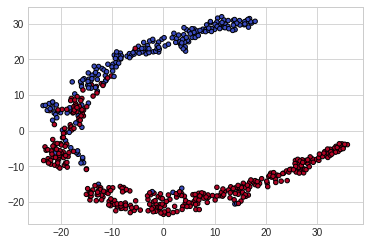

In [82]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [84]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

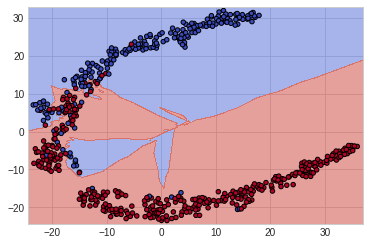

In [86]:
xx, yy = make_meshgrid(X_comp[:,0],X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [ ]:
boston = load_boston()

boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['target'] = boston.target

boston_df.head()

In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = KNeighborsRegressor()
model.fit(X_train,y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

model_scaler = KNeighborsRegressor()
model_scaler.fit(X_train_scaler, y_train)

print(model_scaler.score(X_train_scaler, y_train))
print(model_scaler.score(X_test_scaler, y_test))

In [93]:
estimator = make_pipeline(StandardScaler(), KNeighborsRegressor())

cross_validate(estimator=estimator, X=X, y=y, cv=10, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished


{'fit_time': array([0.00344372, 0.00282884, 0.00311375, 0.00249982, 0.00261116,
        0.00234652, 0.00260353, 0.00519443, 0.00490928, 0.00173903]),
 'score_time': array([0.00256205, 0.00243664, 0.00229979, 0.00214911, 0.00223827,
        0.00198698, 0.00233269, 0.00207376, 0.00198698, 0.00132132]),
 'test_score': array([ 0.57349344,  0.57732981, -0.13857862,  0.29386166,  0.64104266,
         0.58266858,  0.53526567,  0.43433866, -0.29496766,  0.31446342])}

In [94]:
pipe = Pipeline([('scaler', StandardScaler()),('model', KNeighborsRegressor())])
param_grid = [{'model__n_neighbors': [3,5,7], 'model__weights':['uniform', 'distance'], 'model__algorithm':['ball_tree','kd_tree', 'brute']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid,n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [95]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])
{'model__algorithm': 'ball_tree', 'model__n_neighbors': 7, 'model__weights': 'distance'}
0.4973060611762845


In [102]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [103]:
X_comp_df = pd.DataFrame(data = X_comp)
X_comp_df['target'] = y
X_comp_df

,0,target
0,25.397650,24.0
1,46.949848,21.6
2,43.096981,34.7
3,44.083893,33.4
4,44.356815,36.2
...,...,...
501,28.437645,22.4
502,29.090475,20.6
503,29.894766,23.9
504,29.850782,22.0


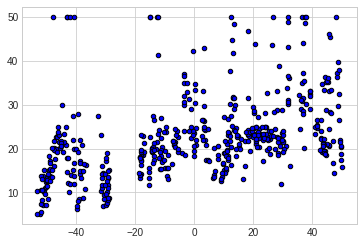

In [105]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [122]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

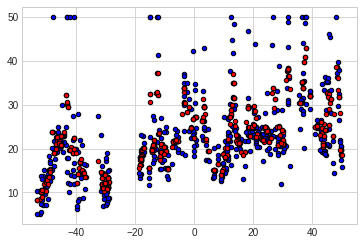

In [123]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 캘리포니아 주택 가격 데이터

In [124]:
cali = fetch_california_housing()

cali_df = pd.DataFrame(cali.data, columns = cali.feature_names)
cali_df['target'] = cali.target

cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [125]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = KNeighborsRegressor()
model.fit(X_train,y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

model_scaler = KNeighborsRegressor()
model_scaler.fit(X_train_scaler, y_train)

print(model_scaler.score(X_train_scaler, y_train))
print(model_scaler.score(X_test_scaler, y_test))

0.45391069187814015
0.15274088115357976
0.7945142782788265
0.6886458156770521


In [126]:
estimator = make_pipeline(StandardScaler(), KNeighborsRegressor())

cross_validate(estimator=estimator, X=X, y=y, cv=10, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    2.4s finished


{'fit_time': array([0.04727387, 0.04557681, 0.03755069, 0.03840899, 0.03880191,
        0.03868556, 0.05378699, 0.03788042, 0.04364824, 0.03978777]),
 'score_time': array([0.26140523, 0.29877853, 0.20897388, 0.20953703, 0.23133636,
        0.25222468, 0.26099634, 0.25763988, 0.28528476, 0.25132751]),
 'test_score': array([0.21742013, 0.67938059, 0.51926051, 0.47730053, 0.60903506,
        0.55878279, 0.36729332, 0.4422147 , 0.30176353, 0.62048907])}

In [127]:
pipe = Pipeline([('scaler', StandardScaler()),('model', KNeighborsRegressor())])
param_grid = [{'model__n_neighbors': [3,5,7], 'model__weights':['uniform', 'distance'], 'model__algorithm':['ball_tree','kd_tree', 'brute']}]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid,n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [128]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])
{'model__algorithm': 'ball_tree', 'model__n_neighbors': 7, 'model__weights': 'distance'}
0.5376515274379832


In [129]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [130]:
X_comp_df = pd.DataFrame(data = X_comp)
X_comp_df['target'] = y
X_comp_df

,0,target
0,-62.487526,4.526
1,87.612282,3.585
2,-25.145855,3.521
3,-3.763179,3.413
4,-3.079850,3.422
...,...,...
20635,31.548187,0.781
20636,-69.427689,0.771
20637,-7.664447,0.923
20638,42.643589,0.847


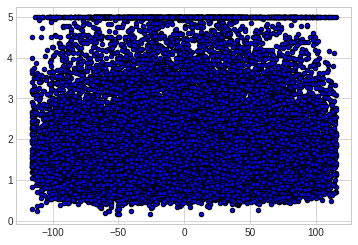

In [131]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [132]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

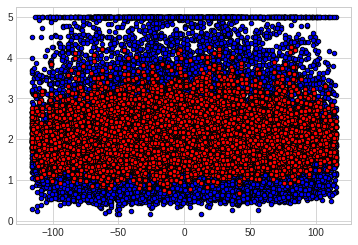

In [133]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')